<a href="https://www.kaggle.com/code/anzarwani2/breast-cancer-case-study-classification-with-pca?scriptVersionId=139385613" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from scipy.stats import zscore
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/breast-cancer-wisconsin-data/data.csv


![Breast Cancer](https://www.rmipc.net/wp-content/uploads/2021/01/bigstock-October-Breast-Cancer-Awarenes-386137327-scaled-e1609940044470.jpg)

# Problem Statement

Breast cancer is one of the most prevalent forms of cancer affecting women worldwide. Early and accurate detection plays a critical role in improving patient outcomes and survival rates. However, conventional diagnostic methods have limitations, and there is a need for more effective and efficient approaches. This problem aims to develop a machine learning model that can accurately classify breast cancer cases as malignant or benign based on various features

# Data Preparation and Processing

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**From initial analysis of the data, it looks that all the columns have correct data types. Further we will check for duplicate rows, missing and unexpected values**

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The column "**Unnamed: 32**" will be dropped in later steps.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df.drop(['id', 'Unnamed: 32'],inplace = True, axis = 1)

**Now, we have a clean dataset. Now we will do Univarate and Bivariate Analysis.**

# Data Analysis

**Univariate Analysis**

In [10]:
diag_count = df['diagnosis'].value_counts()

print(diag_count)

B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

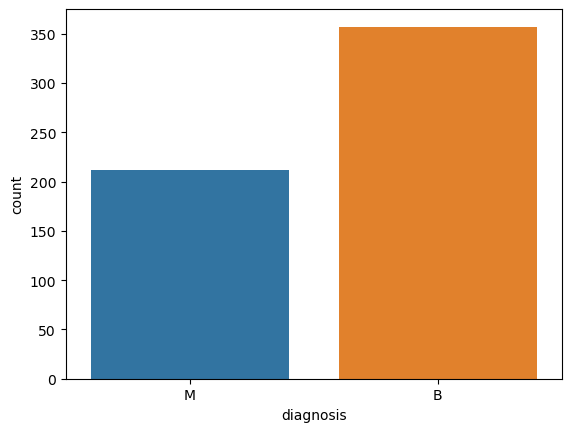

In [11]:
sns.countplot(data = df, x = 'diagnosis')

**Benign cases are more than Malignant. The distribution looks somewhat imbalanced. We will balance it in later stage.**

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: xlabel='radius_mean', ylabel='radius_worst'>

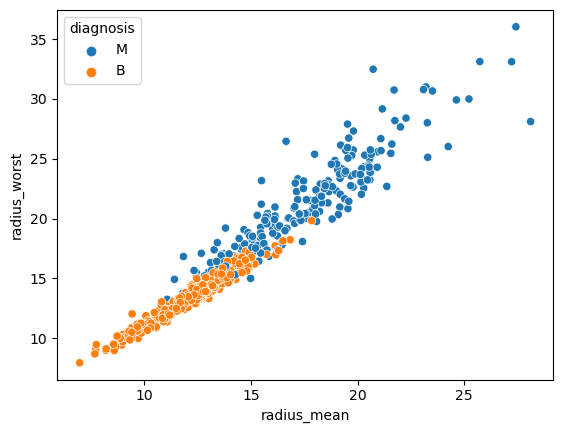

In [13]:
sns.scatterplot(data = df, x = 'radius_mean', y = 'radius_worst', hue = 'diagnosis')

<Axes: xlabel='texture_mean', ylabel='texture_worst'>

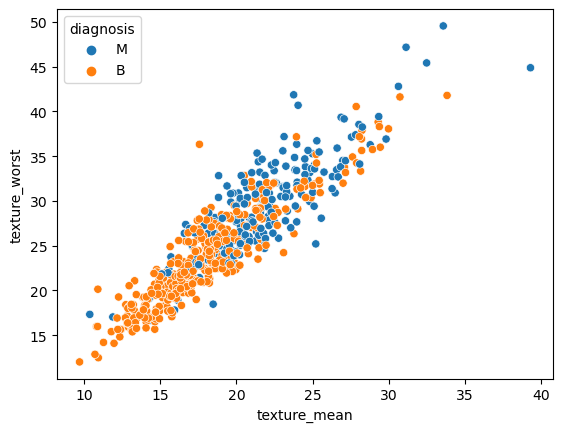

In [14]:
sns.scatterplot(data = df, x = 'texture_mean', y = 'texture_worst', hue = 'diagnosis')

<Axes: xlabel='perimeter_mean', ylabel='perimeter_worst'>

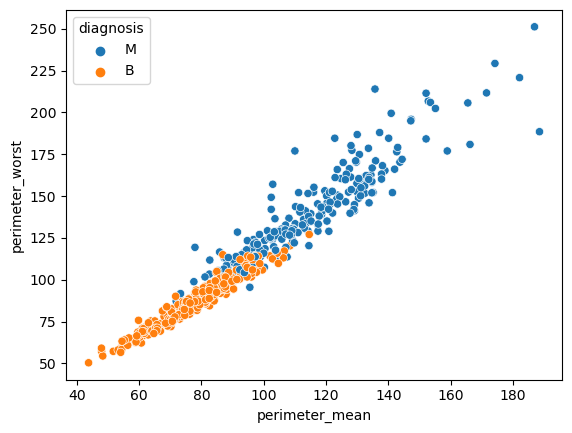

In [15]:
sns.scatterplot(data = df, x = 'perimeter_mean', y = 'perimeter_worst', hue = 'diagnosis')

<Axes: xlabel='area_mean', ylabel='area_worst'>

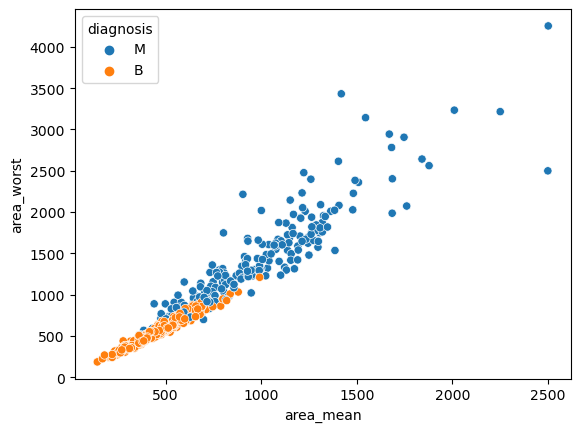

In [16]:
sns.scatterplot(data = df, x = 'area_mean', y = 'area_worst', hue = 'diagnosis')

smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'

<Axes: xlabel='smoothness_mean', ylabel='smoothness_worst'>

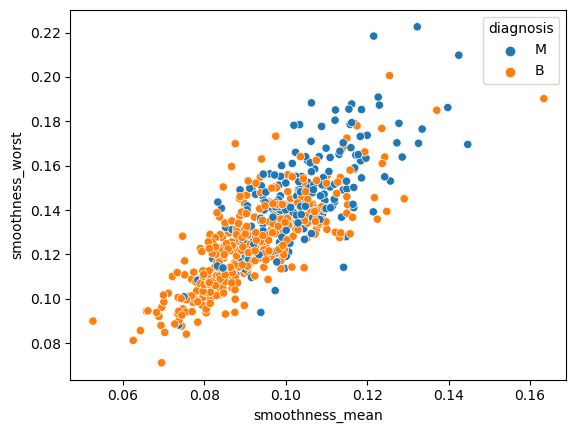

In [17]:
sns.scatterplot(data = df, x = 'smoothness_mean', y = 'smoothness_worst', hue = 'diagnosis')

<Axes: xlabel='compactness_mean', ylabel='compactness_worst'>

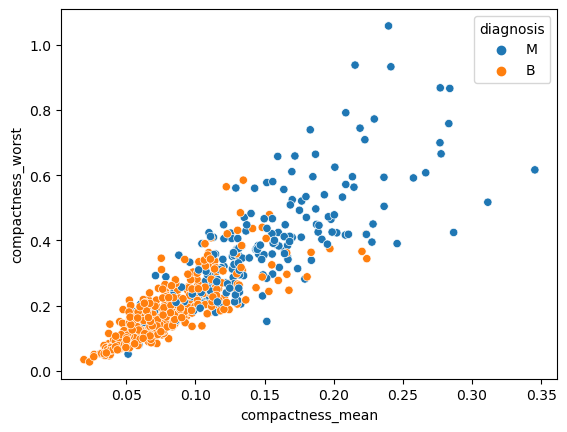

In [18]:
sns.scatterplot(data = df, x = 'compactness_mean', y = 'compactness_worst', hue = 'diagnosis')

<Axes: xlabel='concavity_mean', ylabel='concavity_worst'>

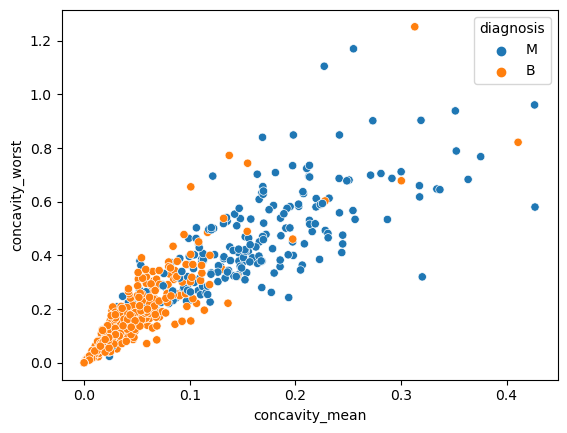

In [19]:
sns.scatterplot(data = df, x = 'concavity_mean', y = 'concavity_worst', hue = 'diagnosis')

<Axes: xlabel='concave points_mean', ylabel='concave points_worst'>

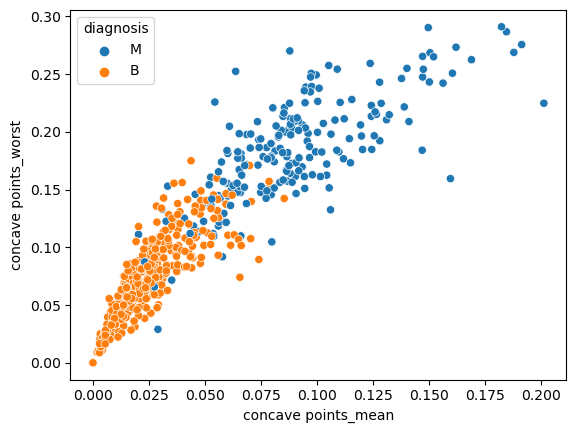

In [20]:
sns.scatterplot(data = df, x = 'concave points_mean', y = 'concave points_worst', hue = 'diagnosis')

<Axes: xlabel='symmetry_mean', ylabel='symmetry_worst'>

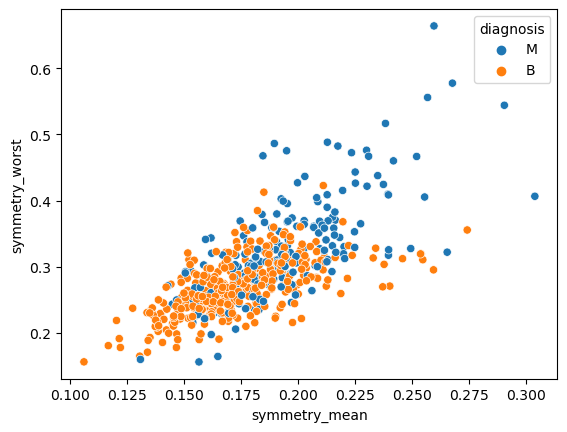

In [21]:
sns.scatterplot(data = df, x = 'symmetry_mean', y = 'symmetry_worst', hue = 'diagnosis')

<Axes: xlabel='fractal_dimension_mean', ylabel='fractal_dimension_worst'>

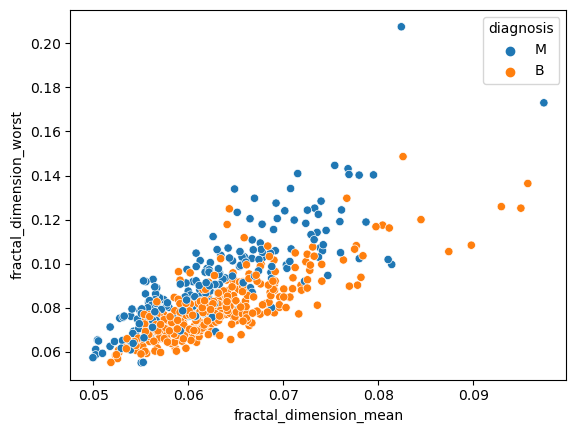

In [22]:
sns.scatterplot(data = df, x = 'fractal_dimension_mean', y = 'fractal_dimension_worst', hue = 'diagnosis')

**Inferences**

* For Smaller radius - Benign.
* For smaller texture - Benign but some are benign with larger texture as well.
* For small Perimeter - Benign
* For small Area - Benign
* In smoothness, Malignant and Benign are almost even spread out.
* Benign is less compact.
* Less concavity and Convex Points - Benign
* Based on symmetry and fractal dimension - Both diagnosis are evenly spread out.


# Basic Modelling

In [23]:
X = df.drop(['diagnosis'], axis = 1)
y = df[['diagnosis']]

In [24]:
diagnosis_count = y.value_counts()

print(diagnosis_count)

diagnosis
B            357
M            212
dtype: int64


In [25]:
from imblearn.over_sampling import SMOTE

smo = SMOTE()
X_balanced, Y_balanced = smo.fit_resample(X, y)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size = 0.3, random_state = 1)

In [27]:
diagnosis_count_bal = Y_balanced.value_counts()

print(diagnosis_count_bal)

diagnosis
B            357
M            357
dtype: int64


In [28]:
algo = [LogisticRegression, KNeighborsClassifier]

In [29]:
def algo_(x_train, x_test, y_train, y_test, algo):
    scores = []
    for alg in algo:
        model = alg()
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        scores.append((alg.__name__, train_score, test_score))
    
    score_df = pd.DataFrame(scores, columns=['Algorithm', 'In Sample Score', 'Out of Sample Score'])
    return score_df
        
    

In [30]:
result_df = algo_(x_train, x_test, y_train, y_test, algo)
print(result_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

              Algorithm  In Sample Score  Out of Sample Score
0    LogisticRegression         0.949900             0.953488
1  KNeighborsClassifier         0.945892             0.930233


The out-sample score for Logistic Regression is around 95%. Now, we will try to do PCA

**Since, there are many columns, we will do PCA to reduce columns and extract features**

# Principle Component Analysis

In [31]:
df_pca = df.copy()

In [32]:
X = df_pca.drop(['diagnosis'], axis = 1)
y = df_pca[['diagnosis']]

In [33]:
XScaled = X.apply(zscore)
XScaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [34]:
covMatrix = np.cov(XScaled, rowvar = False)
print(covMatrix)

[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19415220e-01]
 [ 9.9

In [35]:
pca = PCA(n_components = 30)
pca.fit(XScaled)

PCA(n_components=30)

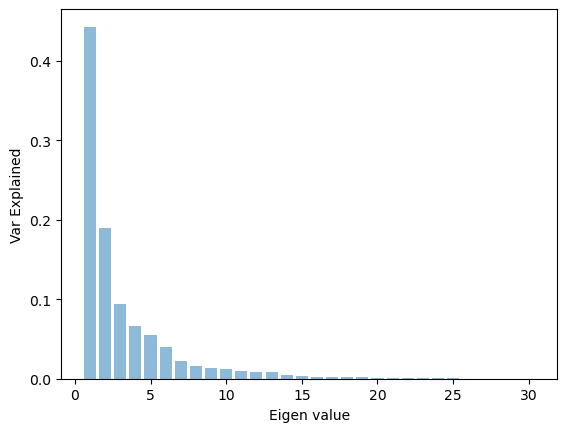

In [36]:
plt.bar(list(range(1,31)), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.ylabel('Var Explained')
plt.xlabel('Eigen value')
plt.show()

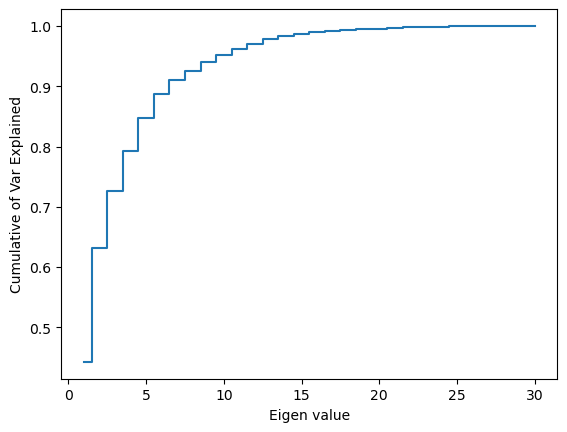

In [37]:
plt.step(list(range(1,31)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cumulative of Var Explained')
plt.xlabel('Eigen value')
plt.show()

In [38]:
pca3 = PCA(n_components = 7)
pca3.fit(XScaled)

print(pca3.components_)
print(pca3.explained_variance_)
Xpca3 = pca3.transform(XScaled)

[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572343e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641144e-02 -8.25723504e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


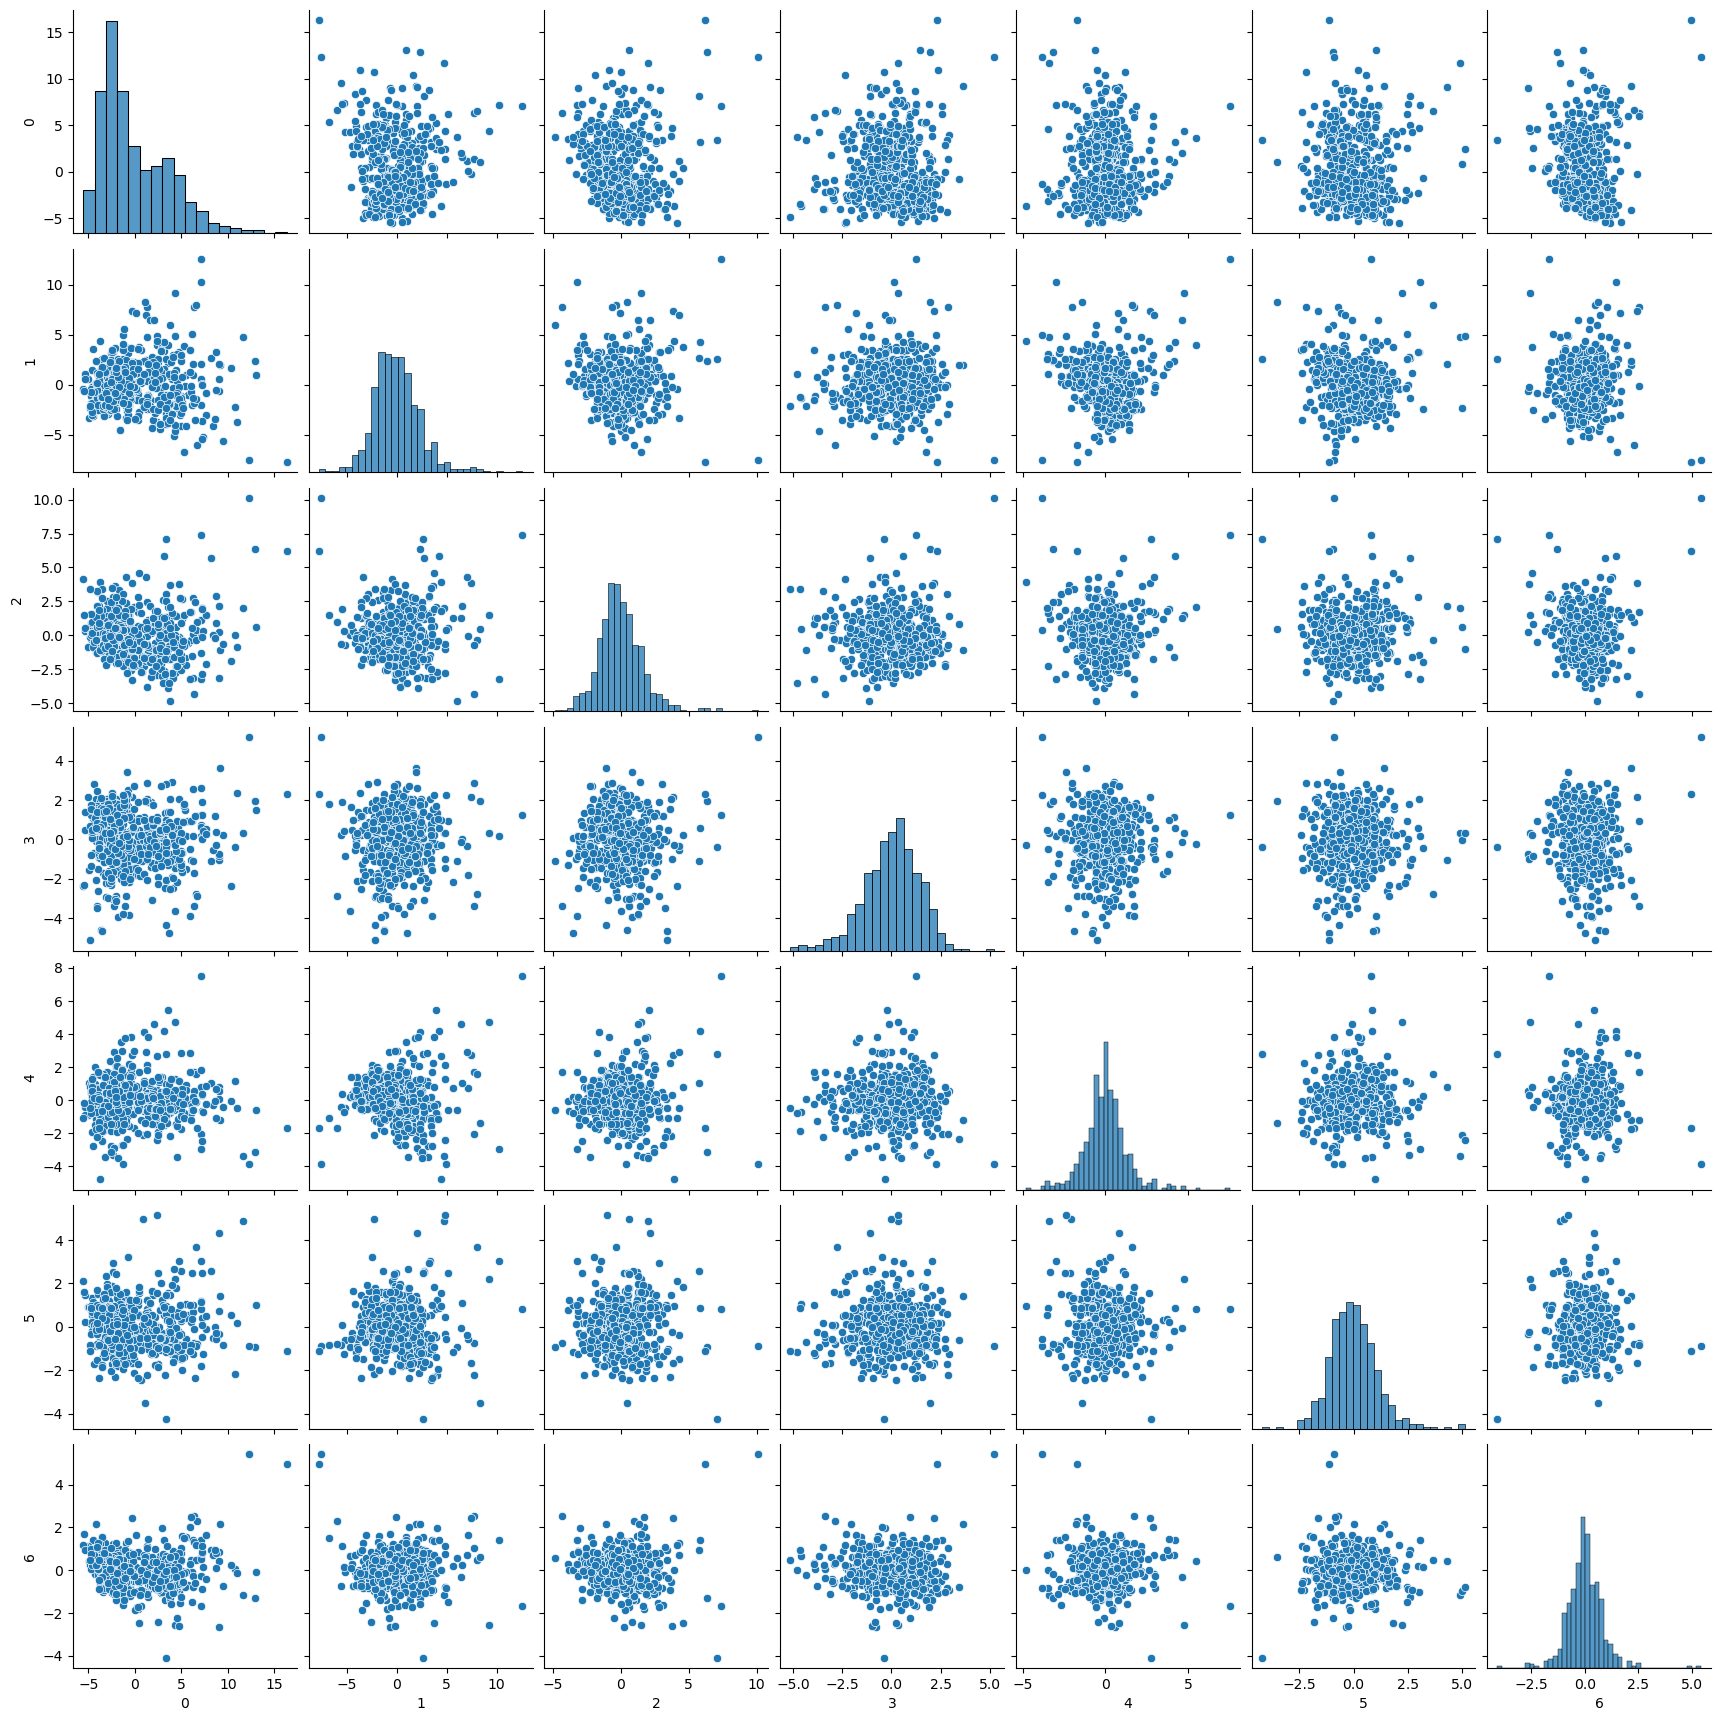

In [39]:
sns.pairplot(pd.DataFrame(Xpca3))

# MODELLING AFTER PCA

In [40]:
smo = SMOTE()
X_balanced, Y_balanced = smo.fit_resample(Xpca3, y)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size = 0.3, random_state = 1)

In [42]:
model_pca = LogisticRegression()
model_pca.fit(x_train, y_train)
y_predict = model_pca.predict(x_test)
train_score = model_pca.score(x_train, y_train)
test_score = model_pca.score(x_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print("LOGISTIC REGRESSION")
print("In Sample score is : ",train_score)
print('_________' * 7)
print('_________' * 7)
print("Out-sample score is : ", test_score)

LOGISTIC REGRESSION
In Sample score is :  0.9739478957915831
_______________________________________________________________
_______________________________________________________________
Out-sample score is :  0.9813953488372092


In [44]:
model_pca_kn = KNeighborsClassifier()
model_pca_kn.fit(x_train, y_train)
y_predict = model_pca_kn.predict(x_test)
train_score = model_pca_kn.score(x_train, y_train)
test_score = model_pca_kn.score(x_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
print('KNearest Neighbours')
print("In Sample score is : ",train_score)
print('_________' * 7)
print('_________' * 7)
print("Out-sample score is : ", test_score)

KNearest Neighbours
In Sample score is :  0.9799599198396793
_______________________________________________________________
_______________________________________________________________
Out-sample score is :  0.9627906976744186


# Final

**Logistic Regression without PCA**
* Score on Training Data = 94%
* Score on Test Data = 95%

**KNeighbours Classifier without PCA**
* Score on Training Data = 93%
* Score on Test Data = 94%

**Logistic Regression with PCA**
* Score on Training Data = 97%
* Score on Test Data = 98%

**KNeighbours Classifier with PCA**
* Score on Training Data = 98%
* Score on Test Data = 96%